![OpenDreamKit logo and EU Flag](header.png)

Review meeting 26 April 2017, Brussels

# Micromagnetic model in Notebook

### Mesh

In [1]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline
system = oc.System(name="system")

L = 30e-9   # size of simulation cube
d = 5e-9   # discretisation cell size (very small here)
mesh = oc.Mesh(p1=(0, 0, 0), p2=(L, L, L), cell=(d, d, d), name="mesh")

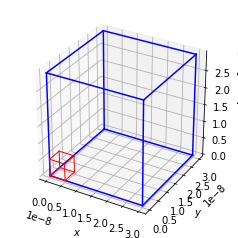

In [2]:
mesh

### LaTeX representation of equations: Hamiltonian and equation of motion

Physical system contains Hamiltonian, dynamics equation and magnetisation vector field:


In [3]:
exchange = oc.Exchange(A=1e-12)

In [4]:
exchange

Exchange(A=1e-12)

In [5]:
system.hamiltonian = exchange + oc.Zeeman(H=(0, 0, 1e6))

In [6]:
system.hamiltonian

Exchange(A=1e-12) + Zeeman(H=(0, 0, 1000000.0))

### Dynamics

In [7]:
system.dynamics = oc.Precession(gamma=2.211e5) + oc.Damping(alpha=0.05)

In [8]:
system.dynamics

Precession(gamma=221100.0) + Damping(alpha=0.05)

### Analysing time-dependent data

In [9]:
td = oc.TimeDriver() 
system.m = df.Field(mesh, value=(1, 0, 0), norm=8.6e5)
td.drive(system, t=2e-10, n=200)    # compute some data

2017/4/24 10:36: Calling OOMMF (system/system.mif) ... [2.2s]


In [10]:
system.dt.head()

,E,Ecount,max_dm/dt,dE/dt,deltaE,Eex,max_spin_angle,stage_max_spin_angle,run_max_spin_angle,FixedZeeman:zeeman:Energy,iteration,stage_iteration,stage,mx,my,mz,last_time_step,t
0,-3.217576e-19,37.0,12651.522111,-3.217315e-07,-2.393715e-19,0.0,0.0,0.0,0.0,-3.217576e-19,6.0,6.0,0.0,0.975718,0.218752,0.011027,7.439594e-13,1.000000e-12
1,-6.434370e-19,44.0,12649.214837,-3.216142e-07,-3.216794e-19,0.0,0.0,0.0,0.0,-6.434370e-19,8.0,1.0,1.0,0.904064,0.426828,0.022051,1.000000e-12,2.000000e-12
2,-9.649599e-19,51.0,12645.370939,-3.214188e-07,-3.215230e-19,0.0,0.0,0.0,0.0,-9.649599e-19,10.0,1.0,2.0,0.788550,0.614080,0.033070,1.000000e-12,3.000000e-12
3,-1.286248e-18,58.0,12639.992752,-3.211454e-07,-3.212885e-19,0.0,0.0,0.0,0.0,-1.286248e-18,12.0,1.0,3.0,0.634841,0.771385,0.044081,1.000000e-12,4.000000e-12
4,-1.607225e-18,65.0,12633.083539,-3.207944e-07,-3.209763e-19,0.0,0.0,0.0,0.0,-1.607225e-18,14.0,1.0,4.0,0.450465,0.891093,0.055081,1.000000e-12,5.000000e-12


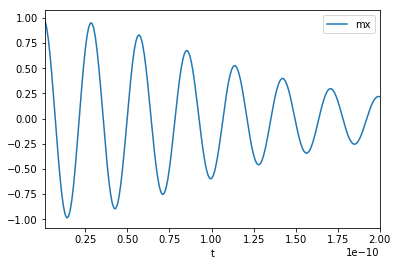

In [11]:
system.dt.plot("t", "mx");

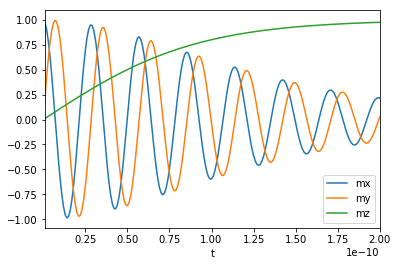

In [12]:
system.dt.plot("t", ["mx", "my", "mz"]);